<a href="https://colab.research.google.com/github/tongnet/FIN7047_2025fall/blob/main/m4b1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2556569759.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bitcoin_data = yf.download('BTC-USD', start='2015-09-20', end='2025-09-20')
[*********************100%***********************]  1 of 1 completed


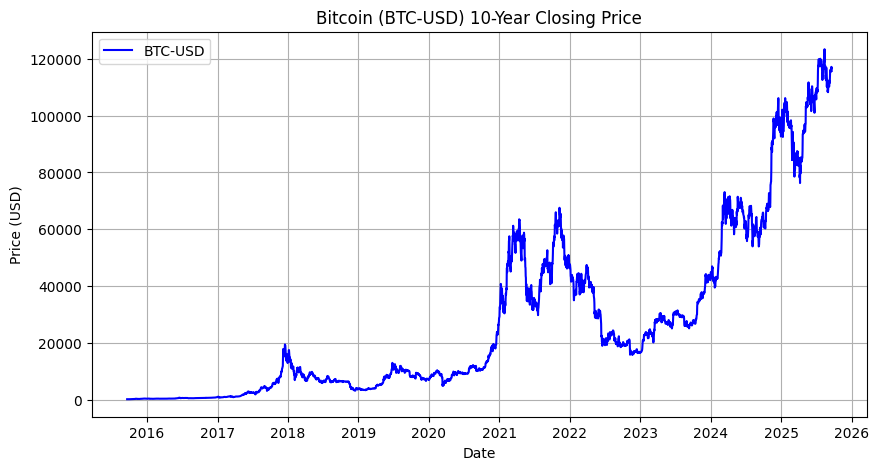

In [1]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt

# Downloading 10-year Bitcoin data from Yahoo Finance
bitcoin_data = yf.download('BTC-USD', start='2015-09-20', end='2025-09-20')

# Plotting the closing price of Bitcoin over the 10-year period
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['Close'], label='BTC-USD', color='blue')
plt.title('Bitcoin (BTC-USD) 10-Year Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

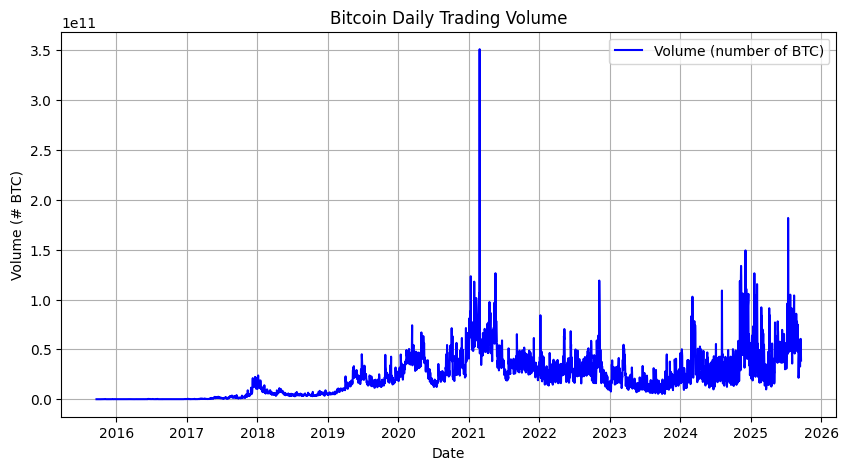

In [2]:
# Plot trading volume
plt.figure(figsize=(10, 5))
plt.plot(bitcoin_data['Volume'], label='Volume (number of BTC)', color='blue')
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume (# BTC)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
first_5_days = bitcoin_data.head(5)
print(first_5_days)

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2015-09-20  231.212006  232.365005  230.910004  231.399002  14444700
2015-09-21  227.085007  231.216995  226.520996  231.216995  19678800
2015-09-22  230.617996  232.386002  225.117004  226.968994  25009300
2015-09-23  230.283005  231.835007  229.591003  230.936005  17254100
2015-09-24  234.529007  235.649002  230.294998  230.358002  25097800


In [4]:
last_5_days = bitcoin_data.tail(5)
print(last_5_days)

Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-09-15  115444.875000  116747.882812  114461.062500  115399.632812   
2025-09-16  116843.187500  117005.273438  114813.093750  115423.757812   
2025-09-17  116468.507812  117328.609375  114794.976562  116840.507812   
2025-09-18  117137.203125  117911.789062  116188.796875  116461.265625   
2025-09-19  115688.859375  117479.757812  115141.820312  117137.671875   

Price            Volume  
Ticker          BTC-USD  
Date                     
2025-09-15  52937859416  
2025-09-16  45781744593  
2025-09-17  60528025996  
2025-09-18  49457272032  
2025-09-19  38828473971  


In [6]:
#Downdown Bitcoin data and save it

import yfinance as yf
import datetime

# Define the ticker symbol for Bitcoin (BTC-USD is the ticker for Bitcoin in USD)
ticker_symbol = "BTC-USD"

# Define the time period (last five years)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)  # 10 years ago
# Get the data from Yahoo Finance
bitcoin_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

#Define the file path
#filepath = "d:/tong/bitcoin_daily_data_10y.csv"   # use in Jupyter
from google.colab import drive
drive.mount('/content/drive')
filepath = "/content/drive/MyDrive/bitcoin_daily_data_10y.csv"  # use in Google Colab

bitcoin_data.to_csv(filepath)

# Save the data to a CSV file to the current directory
bitcoin_data.to_csv("bitcoin_daily_data_10y.csv")

/tmp/ipython-input-3405923951.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bitcoin_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


Mounted at /content/drive


In [ ]:
# check the dataset
import pandas as pd

filepath = "d:/tong/bitcoin_daily_data_10y.csv"  # adjust if needed

# Skip the first two rows
df = pd.read_csv(filepath, skiprows=2)

# Rename columns properly
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(df.head())


        Date       Close        High         Low        Open    Volume
0 2015-09-24  234.529007  235.649002  230.294998  230.358002  25097800
1 2015-09-25  235.143997  237.427002  233.684006  234.362000  22363600
2 2015-09-26  234.339996  235.403000  233.358002  235.076004  13724100
3 2015-09-27  232.757004  234.526001  232.475998  234.139008  14179900
4 2015-09-28  239.141998  239.339005  232.466995  232.835999  24713000


In [34]:
# Calculate Bitcoin daily, weekly, monthly, and annual returns and save it in a file
import pandas as pd
# Load the data
#filepath = "d:/tong/bitcoin_daily_data_10y.csv"   # Jupyter path
filepath = "/content/drive/MyDrive/bitcoin_daily_data_10y.csv"  # Google Colab path

# Skip the first two rows
ret = pd.read_csv(filepath, skiprows=2)

# Rename the first column to Date
ret.rename(columns={'Price': 'Date'}, inplace=True)

# Convert Date to datetime
ret['Date'] = pd.to_datetime(ret['Date'])

# Set Date as index
ret.set_index('Date', inplace=True)

# Keep only needed columns
ret.columns = ['Close', 'High', 'Low', 'Open', 'Volume']


ret['Daily Return'] = ret['Close'].pct_change()
ret['Weekly Return'] = ret['Close'].pct_change(periods=7)
ret['Monthly Return'] = ret['Close'].pct_change(periods=30)
ret['Annual Return'] = ret['Close'].pct_change(periods=365)


# Save the DataFrame with all returns to a new CSV file
output_file_path = 'bitcoin_returns_10y.csv'
ret.to_csv(output_file_path)

output_file_path

'bitcoin_returns_10y.csv'

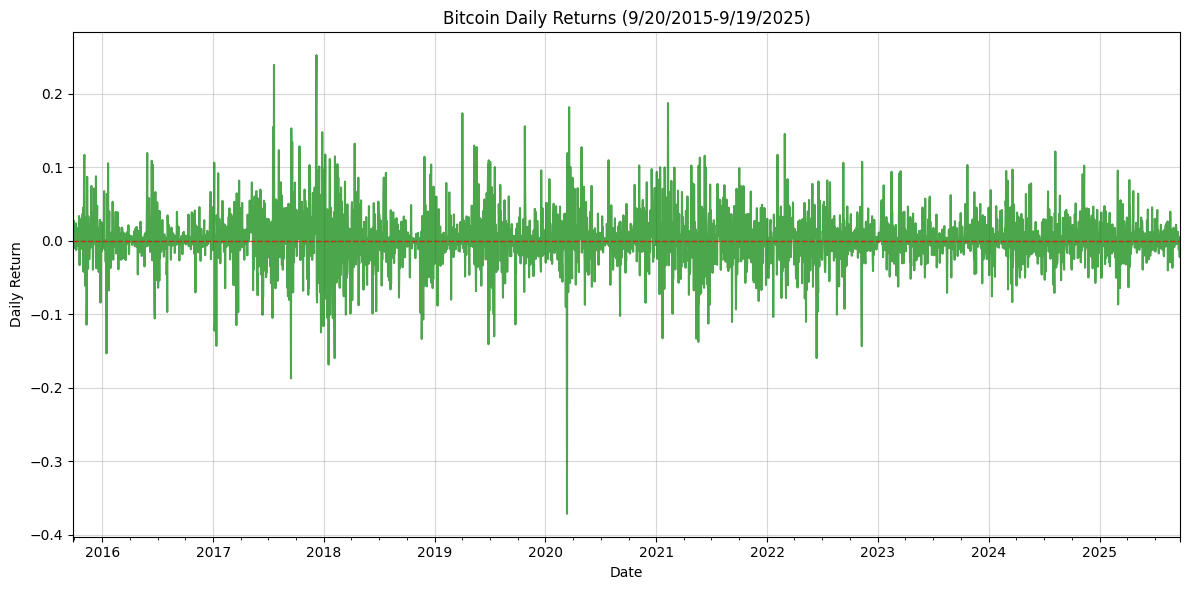

Daily returns plot saved to: bitcoin_daily_returns_from_dataset.png


In [35]:
# Draw a Bitcoin daily return graph
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset containing returns
filepath = "bitcoin_returns_10y.csv"  # Update this to the path of your return dataset
return_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

# Plot daily returns
plt.figure(figsize=(12, 6))
return_data['Daily Return'].plot(color='green', alpha=0.7, title='Bitcoin Daily Returns (9/20/2015-9/19/2025)')
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(alpha=0.5)
plt.tight_layout()

# Save the plot
plot_filepath = 'bitcoin_daily_returns_from_dataset.png'
plt.savefig(plot_filepath)
plt.show()

print("Daily returns plot saved to:", plot_filepath)

In [14]:
# Get key statistics of Bitcoin daily returns
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the dataset containing returns
filepath = "bitcoin_returns_10y.csv"  # Update this to the path of your return dataset
return_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')

daily_returns = return_data['Daily Return'].dropna()

# Calculate statistics
mean_return = daily_returns.mean()
median_return = daily_returns.median()
std_dev_return = daily_returns.std()
skewness_return = skew(daily_returns)
kurtosis_return = kurtosis(daily_returns)
percentile_5 = np.percentile(daily_returns, 5)
percentile_95 = np.percentile(daily_returns, 95)

# Create a results table
stats_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation", "Skewness", "Kurtosis", "5th Percentile", "95th Percentile"],
    "Value": [
        mean_return, median_return, std_dev_return, skewness_return, kurtosis_return, percentile_5, percentile_95
    ]
})

print(stats_table)  # Display the daily return distribution table

            Statistic     Value
0                Mean  0.002324
1              Median  0.001367
2  Standard Deviation  0.035431
3            Skewness -0.042410
4            Kurtosis  7.758416
5      5th Percentile -0.053324
6     95th Percentile  0.056231


/tmp/ipython-input-3043589874.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')


/tmp/ipython-input-4151592542.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


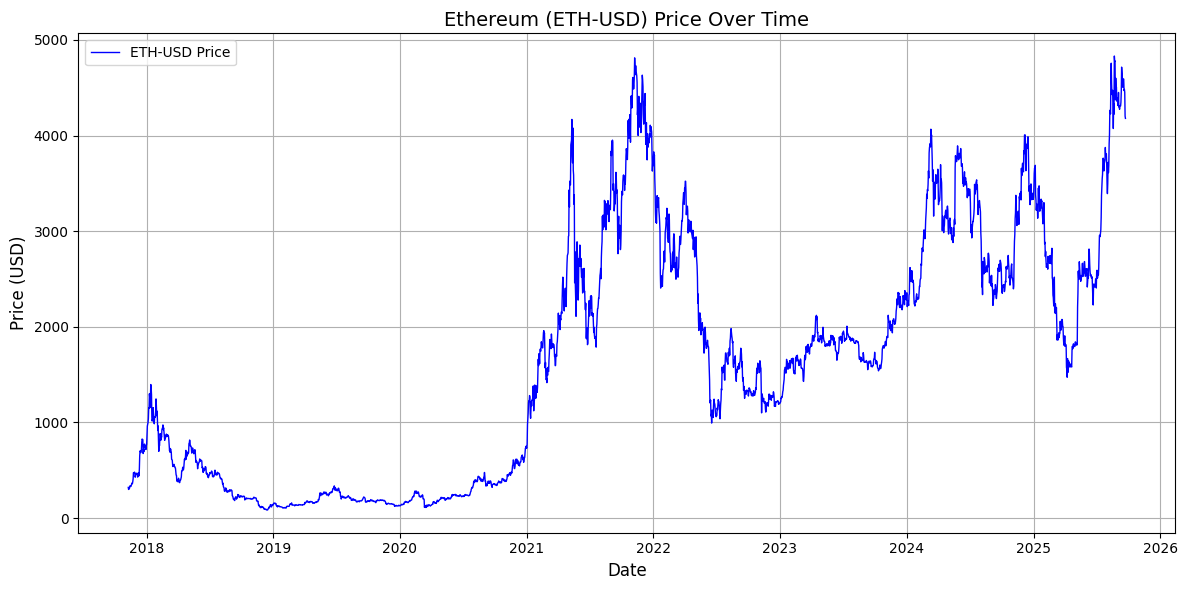

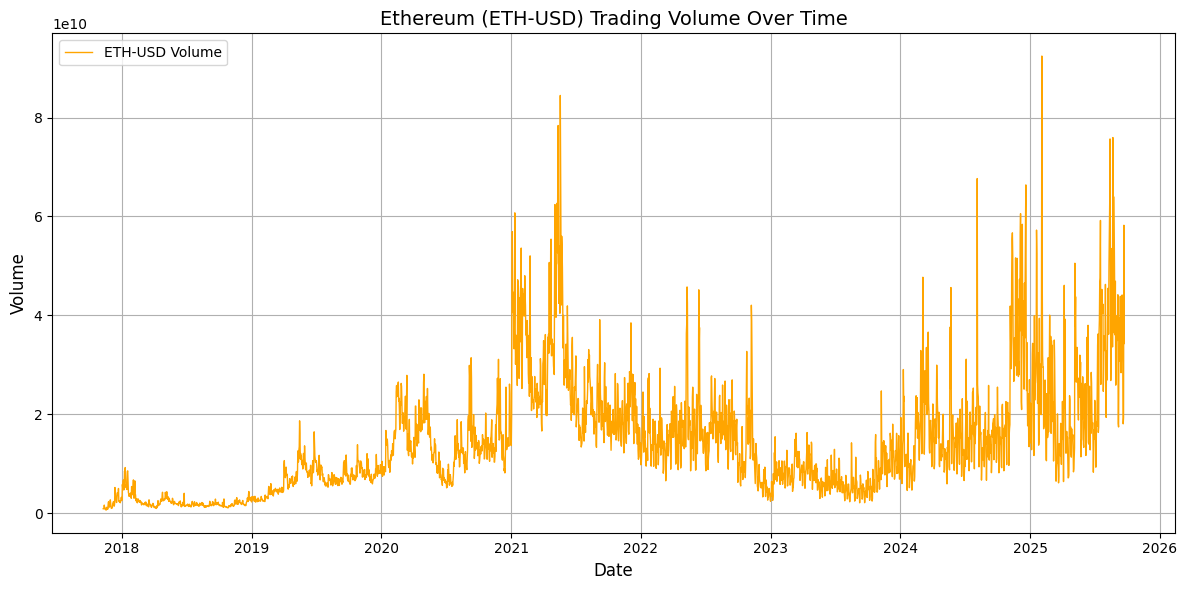

In [16]:
#Get Ethereum price and Volume from Yahoo Finance!: 1) save data to a file, 2) plot price and volume
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for Ethereum
ticker_symbol = "ETH-USD"

# Define the time period (last five years)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)  # 10 years ago
# Get the data from Yahoo Finance
eth_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# Save the data to a CSV file (optional)
eth_data.to_csv("eth_price_volume_data.csv")

# Extract price (Close) and volume data
eth_prices = eth_data['Close']
eth_volume = eth_data['Volume']

# Convert index to NumPy array for plotting
dates = eth_data.index.to_numpy()
prices = eth_prices.to_numpy()
volume = eth_volume.to_numpy()
# Plot the Ethereum price data
plt.figure(figsize=(12, 6))
plt.plot(dates, prices, label='ETH-USD Price', color='blue', linewidth=1)
plt.title('Ethereum (ETH-USD) Price Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the Ethereum volume data
plt.figure(figsize=(12, 6))
plt.plot(dates, volume, label='ETH-USD Volume', color='orange', linewidth=1)
plt.title('Ethereum (ETH-USD) Trading Volume Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Calculate ETH daily return; save to a file; plot daily return
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
filepath = "eth_price_volume_data.csv"

# Skip the first two rows
ret = pd.read_csv(filepath, skiprows=2)

# Rename the first column to Date
ret.rename(columns={'Price': 'Date'}, inplace=True)

# Convert Date to datetime
ret['Date'] = pd.to_datetime(ret['Date'])

# Keep only needed columns
ret.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

#eth_data = pd.read_csv(data_file, parse_dates=['Date'], index_col='Date')

# Convert Date to datetime
ret['Date'] = pd.to_datetime(ret['Date'])

print(ret.head())

        Date       Close        High         Low        Open      Volume
0 2017-11-09  320.884003  329.451996  307.056000  308.644989   893249984
1 2017-11-10  299.252991  324.717987  294.541992  320.670990   885985984
2 2017-11-11  314.681000  319.453003  298.191986  298.585999   842300992
3 2017-11-12  307.907990  319.153015  298.513000  314.690002  1613479936
4 2017-11-13  316.716003  328.415009  307.024994  307.024994  1041889984


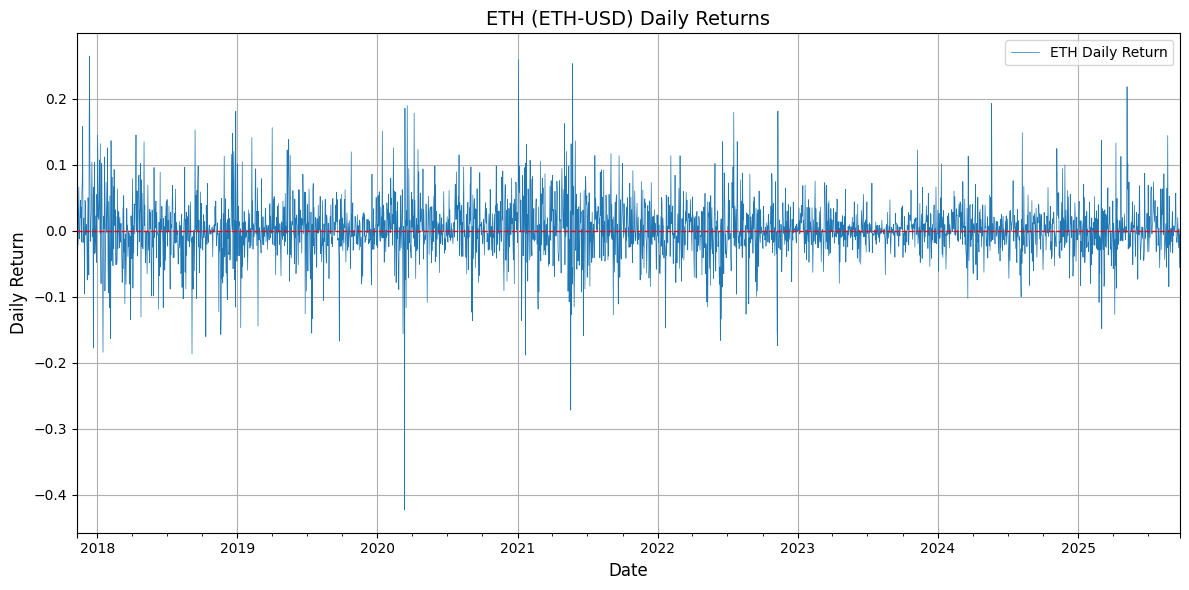

In [40]:
# Calculate ETH daily return; save to a file; plot daily return
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
filepath = "eth_price_volume_data.csv"

# Load data from CSV, skip first two rows
eth_data = pd.read_csv(filepath, skiprows=2)

# Rename columns properly - assuming the order is Date, Close, High, Low, Open, Volume
eth_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

# Set Date as index
eth_data.set_index('Date', inplace=True)

# Keep only needed columns
eth_data = eth_data[['Close', 'Volume']]

# Calculate daily returns
eth_data['Daily Return'] = eth_data['Close'].pct_change()

# Save the daily return data to a new CSV file
eth_data.to_csv("eth_daily_returns.csv")

# Plot the daily returns
plt.figure(figsize=(12, 6))
eth_data['Daily Return'].plot(label='ETH Daily Return', linewidth=0.5)
plt.title('ETH (ETH-USD) Daily Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Highlight zero return line
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Get XRP data and save in a file

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for XRP (Ripple)
ticker_symbol = "XRP-USD"

# Define the time period (last five years)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)  # 10 years ago
# Get the data from Yahoo Finance
xrp_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# Save the data to a CSV file (optional)
xrp_data.to_csv("xrp_price_volume_data.csv")

/tmp/ipython-input-2559132868.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  xrp_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


In [44]:
# read price data from the saved file; estimate XRP daily returns; plot price, volume and returns
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
filepath = "xrp_price_volume_data.csv"

# Skip the first two rows and read with specified column names
xrp_data = pd.read_csv(filepath, skiprows=2)

# Rename columns properly - assuming the order is Date, Close, High, Low, Open, Volume
xrp_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime
xrp_data['Date'] = pd.to_datetime(xrp_data['Date'])

# Set Date as index
xrp_data.set_index('Date', inplace=True)

# Keep only needed columns
xrp_data = xrp_data[['Close', 'Volume']]

# Calculate daily returns
xrp_data['Daily Return'] = xrp_data['Close'].pct_change()

# Save the daily return data to a new CSV file
xrp_data.to_csv("xrp_daily_returns.csv")

# Plot the daily returns (Optional - add if you want to plot in this cell)
# plt.figure(figsize=(12, 6))
# xrp_data['Daily Return'].plot(label='XRP Daily Return', linewidth=0.5)
# plt.title('XRP (XRP-USD) Daily Returns', fontsize=14)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Daily Return', fontsize=12)
# plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Highlight zero return line
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [45]:
#Get Ethereum price and Volume from Yahoo Finance!: 1) save data to a file, 2) plot price and volume
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for Ethereum
ticker_symbol = "^GSPC"

# Define the time period (last five years)
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)  # 10 years ago
# Get the data from Yahoo Finance
sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# Save the data to a CSV file (optional)
sp500_data.to_csv("sp500_price_volume_data.csv")

/tmp/ipython-input-1661841404.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


In [24]:
import pandas as pd

# Load data from CSV, skip first two rows
filepath = "sp500_price_volume_data.csv"
sp500_data = pd.read_csv(filepath, skiprows=2)

# Rename columns properly
sp500_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date column to datetime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Set Date as index
sp500_data.set_index('Date', inplace=True)

# Calculate daily returns
sp500_data['Daily Return'] = sp500_data['Close'].pct_change()

print(sp500_data.head())

# Save cleaned data to CSV
output_file = "sp500_return_data.csv"
sp500_data.to_csv(output_file)

print(f"Data saved to {output_file}")


                  Close         High          Low         Open      Volume  \
Date                                                                         
2015-09-28  1881.770020  1929.180054  1879.209961  1929.180054  4326660000   
2015-09-29  1884.089966  1899.479980  1871.910034  1881.900024  4132390000   
2015-09-30  1920.030029  1920.530029  1887.140015  1887.140015  4525070000   
2015-10-01  1923.819946  1927.209961  1900.699951  1919.650024  3983600000   
2015-10-02  1951.359985  1951.359985  1893.699951  1921.770020  4378570000   

            Daily Return  
Date                      
2015-09-28           NaN  
2015-09-29      0.001233  
2015-09-30      0.019076  
2015-10-01      0.001974  
2015-10-02      0.014315  
Data saved to sp500_return_data.csv


In [25]:
# Calculate ETH daily return; save to a file; plot daily return
import pandas as pd
import matplotlib.pyplot as plt

# Load XRP data from CSV
filepath = "sp500_price_volume_data.csv"

# Skip the first two rows
sp500_data = pd.read_csv(filepath, skiprows=2)

# Rename the first column to Date
sp500_data.rename(columns={'Price': 'Date'}, inplace=True)

# Convert Date to datetime
sp500_data['Date'] = pd.to_datetime(ret['Date'])

# Keep only needed columns
sp500_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Calculate daily returns
sp500_data['Daily Return'] = sp500_data['Close'].pct_change()

sp500_data.index.name = "Date"      # give the index a name

# Save the daily return data to a new CSV file
sp500_data.to_csv("sp500_daily_returns.csv")


In [46]:
# Read daily returns of different assets and combine them; compare daily returns
import pandas as pd

# Load datasets with Date as index
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date', date_format='%Y-%m-%d')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500'})

# Concatenate datasets (aligning on index using outer join to keep all dates)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# Ensure index is datetime
combined_data.index = pd.to_datetime(combined_data.index)

# Add a 'Year' column for grouping
combined_data['Year'] = combined_data.index.year

# Compute yearly average returns for each security, skipping NaN values
yearly_avg_returns = combined_data.groupby('Year').mean()

# Compute overall average returns for all years, skipping NaN values
all_years_avg = combined_data.drop(columns='Year').mean().to_frame(name='All Years').T

# Concatenate overall average with yearly averages
final_avg_returns = pd.concat([yearly_avg_returns, all_years_avg])

# Save results to CSV
output_file = "average_returns_summary1.csv"
final_avg_returns.to_csv(output_file)

print(f"Average returns summary saved to {output_file}.")

Average returns summary saved to average_returns_summary1.csv.


In [47]:
# estimate standard deviations of different cryptos
import pandas as pd
import numpy as np

# Load datasets
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC Return'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH Return'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP Return'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500 Return'})

# Combine all into one DataFrame (outer join to align dates)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# --- Year Handling (cleaned) ---
# Make sure index is datetime
combined_data.index = pd.to_datetime(combined_data.index, errors='coerce')

# Drop rows with invalid/missing dates
combined_data = combined_data[combined_data.index.notna()]

# Add a Year column
combined_data['Year'] = combined_data.index.year

# Exclude 2025 data
combined_data = combined_data[combined_data['Year'] < 2025]

# --- Standard Deviation Computation ---
# Function to compute std dev (exclude Year column)
def calculate_standard_deviation(group):
    return group.drop(columns='Year').std()

# Yearly standard deviations
yearly_std_devs = combined_data.groupby('Year').apply(calculate_standard_deviation)

# Overall standard deviation (all years combined)
all_years_std_dev = calculate_standard_deviation(combined_data).rename('All Years')

# Combine yearly + overall results
final_std_devs = pd.concat([yearly_std_devs, all_years_std_dev.to_frame().T])

# Save to CSV
output_file = "yearly_standard_deviations1.csv"
final_std_devs.to_csv(output_file)

print(f"Standard deviations saved to {output_file}")


Standard deviations saved to yearly_standard_deviations1.csv


/tmp/ipython-input-229676296.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_std_devs = combined_data.groupby('Year').apply(calculate_standard_deviation)


In [49]:
# Sharpe Ratios of different cryptos and SP500
import pandas as pd
import numpy as np

# Load datasets
btc_data = pd.read_csv("bitcoin_returns_10y.csv", parse_dates=['Date'], index_col='Date')
eth_data = pd.read_csv("eth_daily_returns.csv", parse_dates=['Date'], index_col='Date')
xrp_data = pd.read_csv("xrp_daily_returns.csv", parse_dates=['Date'], index_col='Date')
sp500_data = pd.read_csv("sp500_return_data.csv", parse_dates=['Date'], index_col='Date')

# Retain only "Daily Return" columns and rename
btc_data = btc_data[['Daily Return']].rename(columns={'Daily Return': 'BTC Return'})
eth_data = eth_data[['Daily Return']].rename(columns={'Daily Return': 'ETH Return'})
xrp_data = xrp_data[['Daily Return']].rename(columns={'Daily Return': 'XRP Return'})
sp500_data = sp500_data[['Daily Return']].rename(columns={'Daily Return': 'SP500 Return'})

# Merge datasets (outer join to align on dates)
combined_data = pd.concat([sp500_data, btc_data, eth_data, xrp_data], axis=1, join='outer')

# Ensure index is datetime
combined_data.index = pd.to_datetime(combined_data.index, errors='coerce')
combined_data = combined_data[combined_data.index.notna()]

# Align strictly with SP500 trading days
combined_data = combined_data.loc[sp500_data.index]

# Add a Year column
combined_data['Year'] = combined_data.index.year

# Exclude 2025 data
combined_data = combined_data[combined_data['Year'] < 2025]

# Define risk-free rate (daily, assuming 2% annualized)
risk_free_rate_daily = 0.02 / 252

# Function to compute Sharpe ratios column-wise
def calculate_sharpe(group, risk_free_rate):
    mean_return = group.mean()
    std_dev = group.std()
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev.replace(0, np.nan)  # avoid div by zero
    return sharpe_ratio

# Compute Sharpe ratios for each year
yearly_sharpe_ratios = combined_data.groupby('Year').apply(
    lambda group: calculate_sharpe(group.drop(columns='Year'), risk_free_rate_daily)
)

# Compute Sharpe ratios for all years combined
all_years_sharpe = calculate_sharpe(combined_data.drop(columns='Year'), risk_free_rate_daily).rename('All Years')

# Combine results
final_sharpe_ratios = pd.concat([yearly_sharpe_ratios, all_years_sharpe.to_frame().T])

# Save results
output_file = "yearly_sharpe_ratios.csv"
final_sharpe_ratios.to_csv(output_file)

print(f"Yearly and all-time Sharpe ratios saved to {output_file}")

Yearly and all-time Sharpe ratios saved to yearly_sharpe_ratios.csv


/tmp/ipython-input-571729002.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_sharpe_ratios = combined_data.groupby('Year').apply(
